<a href="https://colab.research.google.com/github/Bilol2747/my_projects_data_science/blob/main/Bemorga_mos_keluvchi_dori_tavsiya_qilish_tizimi_loyihasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bemorga dori tavsiya qilish tizimi

Bir xil kasallikdan aziyat chekkan bemorlar haqida ma'lumot to'plangan .

Davolash kursi davomida bemorlarga 5 xil doridan biri ijobiy ta'sir qildi.
#Vazifa
Xuddi shu kasallik bilan kasallangan kelajakdagi bemorga qaysi dori mos kelishi mumkinligini aniqlaydigan model yaratish.

Ushbu muammoni ko'p toifali klassifikator (multiclass classification) yordamida xal qildik.

Model yaratish uchun Decision Tree algoritmidan foydalanamiz.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv")

#Ustunlar

Age - yosh

Sex - jins

BP - qon bosimi

Cholesterol - qondagi xolesterol

Na_to_K - organizmdagi natriy miqdorining kaliyga nisbati

#Malumotlarni tahlil qilish

In [ ]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
143,74,M,HIGH,NORMAL,15.436,drugY
84,47,F,LOW,HIGH,10.067,drugC
77,26,F,HIGH,NORMAL,19.161,drugY
45,66,F,NORMAL,NORMAL,8.107,drugX
91,41,M,HIGH,NORMAL,15.156,drugY
108,72,M,HIGH,NORMAL,9.677,drugB
105,37,M,LOW,NORMAL,8.968,drugX
68,54,M,NORMAL,HIGH,24.658,drugY
69,18,F,HIGH,NORMAL,24.276,drugY
82,32,F,LOW,HIGH,9.712,drugC


In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df['Drug'].value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


Matnli ustunlarni songa o'tkazib olamiz

In [ ]:
encoder= LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['BP'] = encoder.fit_transform(df['BP'])
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'])
#df['Drug']=encoder.fit_transform(df['Drug'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


korrelatsiya

In [ ]:
cor=df.corr()
cor.style.background_gradient(cmap='coolwarm')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


In [ ]:
df.corrwith(df['Drug']).abs().sort_values(ascending=False)

,0
Drug,1.000000
Na_to_K,0.589120
BP,0.372868
Sex,0.098573
Cholesterol,0.055629
Age,0.004828


In [ ]:
x = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y=df['Drug'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4, random_state=54)

In [ ]:
model_tree=DecisionTreeClassifier(min_impurity_decrease=0.04, max_depth=4 , min_samples_leaf=8)
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.04,
                       min_samples_leaf=8)

In [ ]:
y_predict= model_tree.predict(x_test)

#Modelni baholaymiz

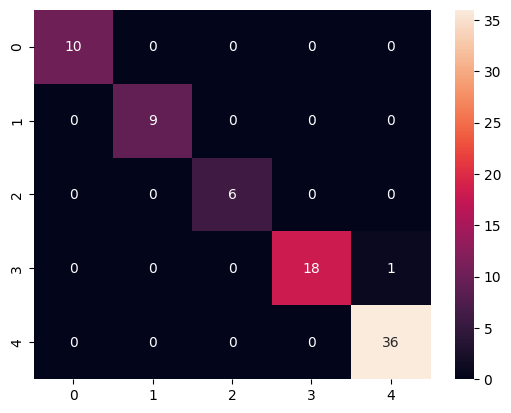

MODEL ANIQLIGI :  0.9875


In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)
plt.show()
print('MODEL ANIQLIGI : ', metrics.accuracy_score(y_test, y_predict))

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         9
       drugC       1.00      1.00      1.00         6
       drugX       1.00      0.95      0.97        19
       drugY       0.97      1.00      0.99        36

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



#Dataset kichkina bo'lganligi sababli train\test setlarga ajratmaymiz

In [ ]:
predict = cross_val_predict(estimator = model_tree, X = x, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))
print("MODEL ANIQLIGI: ",metrics.accuracy_score(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      0.56      0.72        16
       drugX       0.88      0.98      0.93        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.95       200
   macro avg       0.96      0.88      0.91       200
weighted avg       0.95      0.95      0.95       200

MODEL ANIQLIGI:  0.95


#Dicision Tree modeli grafigi

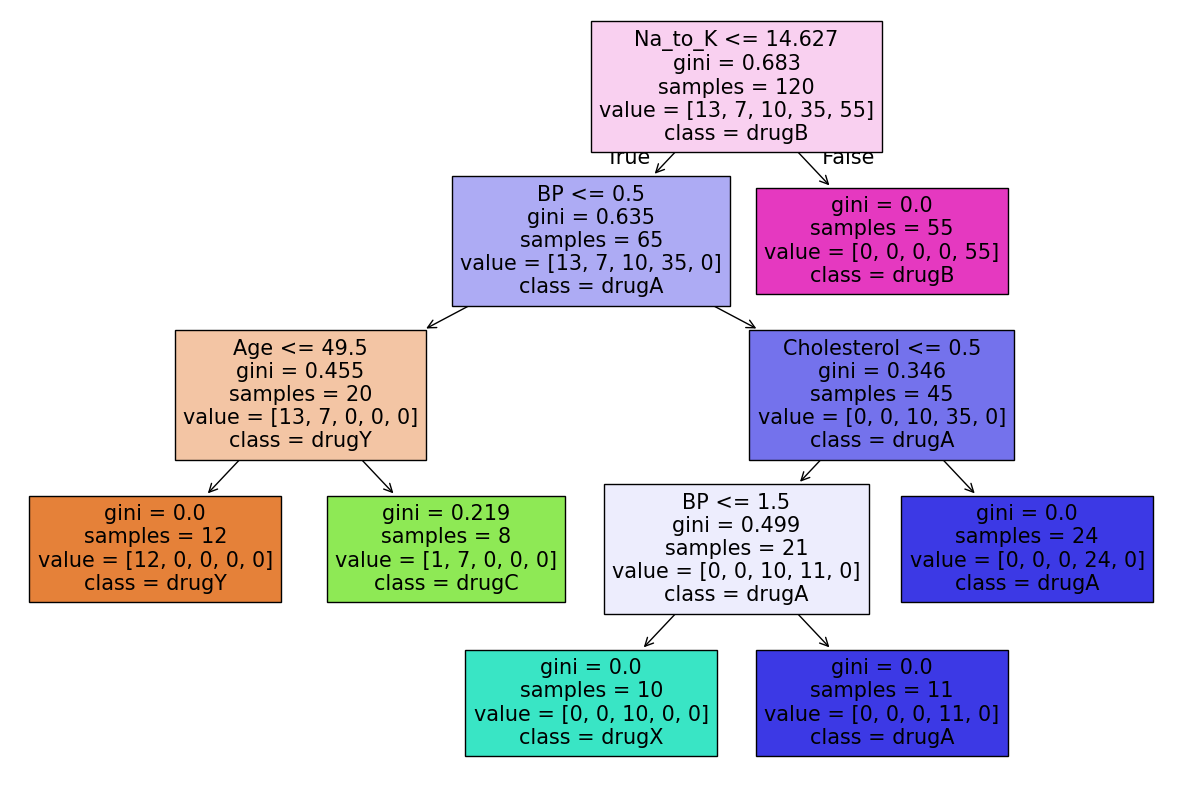

In [105]:
col= df.drop('Drug', axis=1).columns
names= df['Drug'].unique()

plt.figure(figsize=(15,10))
tree.plot_tree(model_tree, feature_names=col, class_names=names, filled=True)
plt.show()

#Random Forest algoritmi

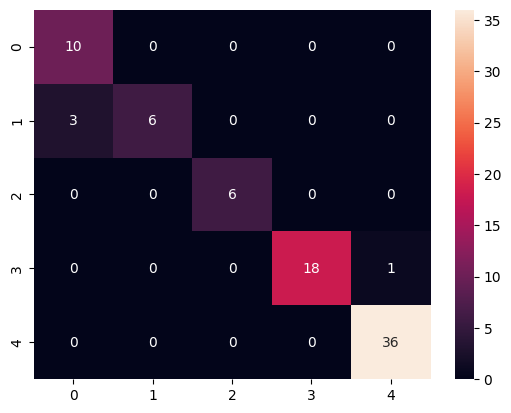

MODEL ANIQLIGI :  0.95


In [107]:
r_model=RandomForestClassifier(n_estimators=25)
r_model.fit(x_train,y_train)
predict=r_model.predict(x_test)
sns.heatmap(metrics.confusion_matrix(y_test, predict), annot=True)
plt.show()
print('MODEL ANIQLIGI : ', metrics.accuracy_score(y_test, predict))